In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from datetime import date, datetime, timedelta
import data_preperation as prep
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
import warnings
warnings.filterwarnings('ignore')
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from xgboost import XGBRegressor
from xgboost import XGBClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report

#example of how to call preparation.py
import data_process as proc
import data_preperation as prep
from utils_scenario import *

In [2]:
def get_baselines(x_df, x, test_size = 0.2):
    y_baseline_speed = np.array(x_df['speed_forecast'])
    y_baseline_cos_wind = np.array(x_df['cos_wind_dir_forecast'])
    y_baseline_sin_wind = np.array(x_df['sin_wind_dir_forecast'])
    _, _, _, y_test_baseline_speed = train_test_split(x, y_baseline_speed, test_size = test_size, shuffle = False)
    _, _, _, y_test_baseline_cos_wind = train_test_split(x, y_baseline_cos_wind, test_size = test_size, shuffle = False)
    _, _, _, y_test_baseline_sin_wind = train_test_split(x, y_baseline_sin_wind, test_size = test_size, shuffle = False)
    y_baseline_dangerous_scenarios = get_all_dangerous_scenarios(y_test_baseline_speed, y_test_baseline_cos_wind, y_baseline_sin_wind)
    y_baseline_scenarios = get_all_scenarios(y_test_baseline_speed, y_test_baseline_cos_wind, y_baseline_sin_wind, b_scenarios=True)
    return y_test_baseline_speed, y_test_baseline_cos_wind, y_test_baseline_sin_wind, y_baseline_dangerous_scenarios, y_baseline_scenarios

In [5]:
#call data_preperation.py 
measurement=prep.prepare_measurement()
forecast = prep.prepare_forecast()

#keep useful columns 
# measurement= measurement[['speed', 'cos_wind_dir', 'sin_wind_dir', 'temp', 'radiation', 'precip', 'season', 'am']]

read csv semester csv files from 2015s2 to 2020s1
smooth wind direction
generate seasonality categorical feature
generate am/pm categorical feature
reading forecast data
smooth wind direction


In [26]:
forecast

,speed,temp,rad,precip,f_date,p_date,f_period,cos_wind_dir,sin_wind_dir
0,2.102400,12.290000,0.000000,0.0,2015-01-01 00:00:00,2015-01-01 00:00:00,0,0.546992,0.837138
1,2.139290,12.063300,0.000000,0.0,2015-01-01 01:00:00,2015-01-01 00:00:00,1,0.409646,0.912245
2,2.176170,11.836700,0.000000,0.0,2015-01-01 02:00:00,2015-01-01 00:00:00,2,0.262260,0.964997
3,2.213050,11.610000,0.000000,0.0,2015-01-01 03:00:00,2015-01-01 00:00:00,3,0.108447,0.994102
4,2.319730,11.500000,0.000000,0.0,2015-01-01 04:00:00,2015-01-01 00:00:00,4,0.175858,0.984416
5,2.426400,11.390000,0.000000,0.0,2015-01-01 05:00:00,2015-01-01 00:00:00,5,0.242454,0.970163
6,2.533080,11.280000,0.000000,0.0,2015-01-01 06:00:00,2015-01-01 00:00:00,6,0.307925,0.951411
7,2.869570,12.030000,10.000000,0.0,2015-01-01 07:00:00,2015-01-01 00:00:00,7,0.295661,0.955293
8,3.206060,12.780000,20.000000,0.0,2015-01-01 08:00:00,2015-01-01 00:00:00,8,0.283349,0.959017
9,3.542560,13.530000,30.000000,0.0,2015-01-01 09:00:00,2015-01-01 00:00:00,9,0.270990,0.962582


In [4]:
print('earliest measurement date', measurement.index.min()) 
print('earliest measurement date', measurement.index.max()) 

earliest measurement date 2015-07-01 00:00:00
earliest measurement date 2020-05-06 14:00:00


In [46]:
#call data_process.py

steps_in = 24
steps_out = 24


x_df, y_df, x, y_speed = proc.prepare_x_y(measurement, forecast, steps_in, steps_out, 'speed')
x_df, y_df, x, y_cos = proc.prepare_x_y(measurement, forecast, steps_in, steps_out, 'cos_wind_dir')
x_df, y_df, x, y_sin = proc.prepare_x_y(measurement, forecast, steps_in, steps_out, 'sin_wind_dir')
y_scenarios = get_all_scenarios(y_speed, y_cos, y_sin, b_scenarios = True)
y_dangerous = get_all_dangerous_scenarios(y_speed, y_cos, y_sin)
X_train, X_test, y_train_dangerous, y_test_dangerous = train_test_split(x, y_dangerous, test_size=0.2, shuffle = False)
_, _, y_train_scenarios, y_test_scenarios = train_test_split(x, y_scenarios, test_size=0.2, shuffle = False)
_, _, y_train_speed, y_test_speed = train_test_split(x, y_speed, test_size=0.2, shuffle = False)
_, _, y_train_cos, y_test_cos = train_test_split(x, y_cos, test_size=0.2, shuffle = False)
_, _, y_train_sin, y_test_sin = train_test_split(x, y_sin, test_size=0.2, shuffle = False)

In [41]:
#Regressors
xg_speed = XGBRegressor(max_depth = 5)
xg_speed.fit(X_train, y_train_speed)
y_hat_speed = xg_speed.predict(X_test)

xg_cos = XGBRegressor(max_depth = 5)
xg_cos.fit(X_train, y_train_cos)
y_hat_cos = xg_cos.predict(X_test)

xg_sin = XGBRegressor(max_depth = 5)
xg_sin.fit(X_train, y_train_sin)
y_hat_sin = xg_sin.predict(X_test)

y_hat_scenario = get_all_scenarios(y_hat_speed, y_hat_cos, y_hat_sin, b_scenarios=True)
y_hat_dangerous = get_all_dangerous_scenarios(y_hat_speed, y_hat_cos, y_hat_sin)

In [ ]:
y_hat_scenario_from_regression = get_all_scenarios(y_hat_speed, y_hat_cos, y_hat_sin, b_scenarios=True)
y_hat_dangerous_from_regression = get_all_dangerous_scenarios(y_hat_speed, y_hat_cos, y_hat_sin)

In [251]:
#Classifiers
xg_dangerous_scenario = XGBClassifier(max_depth = 5)
xg_dangerous_scenario.fit(X_train, y_train_dangerous)
y_hat_dangerous = xg_dangerous_scenario.predict(X_test)

xg_scenario = XGBClassifier(max_depth = 5)
xg_scenario.fit(X_train, y_train_scenarios)
y_hat_scenarios = xg_scenario.predict(X_test)

In [47]:
#Baselines
y_test_baseline_speed, y_test_baseline_cos_wind, y_test_baseline_sin_wind, y_baseline_dangerous_scenarios, y_baseline_scenarios = get_baselines(x_df, x)

In [52]:
pd.Series(y_baseline_scenarios).value_counts()

1    6603
2    1166
3     387
5     186
4     125
6      28
dtype: int64

In [253]:
#Scores
#print("MSE speed is: ", mean_squared_error(y_test_speed, y_hat_speed))
print("MAE speed is: ", mean_absolute_error(y_test_speed, y_hat_speed))
#print("MSE baseline speed is: ", mean_squared_error(y_test_speed, baseline_speed))
print("MAE baseline speed is: ", mean_absolute_error(y_test_speed, y_test_baseline_speed))

#print("MSE cos is: ", mean_squared_error(y_te_cos, y_hat_cos))
print("MAE cos is: ", mean_absolute_error(y_test_cos, y_hat_cos))
#print("MSE baseline cos is: ", mean_squared_error(y_te_cos, baseline_cos))
print("MAE baseline cos is: ", mean_absolute_error(y_test_cos, y_test_baseline_cos_wind))

#print("MSE sin is: ", mean_squared_error(y_te_sin, y_hat_sin))
print("MAE sin is: ", mean_absolute_error(y_test_sin, y_hat_sin))
#print("MSE baseline sin is: ", mean_squared_error(y_te_sin, baseline_sin))
print("MAE baseline sin is: ", mean_absolute_error(y_test_sin, y_test_baseline_sin_wind))

MAE speed is:  0.7399520577531989
MAE baseline speed is:  1.1141899511013773
MAE cos is:  0.20415327436508807
MAE baseline cos is:  0.2760654579276871
MAE sin is:  0.22570930051015992
MAE baseline sin is:  0.28813579861752936


In [254]:
print("Accuracy for classification from regression is:", accuracy_score(y_test_scenarios, y_hat_scenario_from_regression))
print("Accuracy for baseline is:", accuracy_score(y_test_scenarios, y_baseline_scenarios))
print("Accuracy for classification based prediction is:", accuracy_score(y_test_scenarios, y_hat_scenarios))

print("Accuracy for dangerous classification is:", accuracy_score(y_test_dangerous, y_hat_dangerous))
print("Accuracy for baseline dangerous is:", accuracy_score(y_test_dangerous, y_baseline_dangerous_scenarios))
print("Naive baseline for dangerous is: ", 1 - np.sum(y_test_dangerous)/len(y_test_dangerous))

Accuracy for classification from regression is: 0.8192021471269977
Accuracy for baseline is: 0.6857386848847139
Accuracy for classification based prediction is: 0.8303037696718312
Accuracy for dangerous classification is: 0.9714529705989996
Accuracy for baseline dangerous is: 0.941929974380871
Naive baseline for dangerous is:  0.9752348420153715


In [237]:
len(y_test_cos)

4683

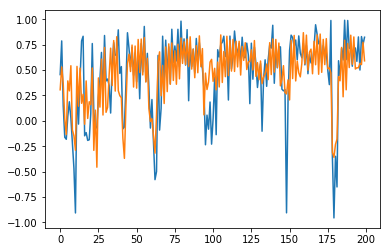

In [233]:
plt.plot(y_test_cos[:200])
plt.plot(y_hat_cos[:200])
plt.show()

In [71]:
#6
Accuracy for classification from regression is: 0.8279
Accuracy for baseline is: 0.6823
Accuracy for classification based prediction is: 0.8408
    
    
MAE speed is:  0.7302
MAE baseline speed is:  1.097
MAE cos is:  0.1862
MAE baseline cos is:  0.2697
MAE sin is:  0.2174
MAE baseline sin is:  0.2874


#12
Accuracy for classification from regression is: 0.8261
Accuracy for baseline is: 0.7072
Accuracy for classification based prediction is: 0.8385
    
MAE speed is:  0.7403
MAE baseline speed is:  1.100
MAE cos is:  0.1955
MAE baseline cos is:  0.2717
MAE sin is:  0.2203
MAE baseline sin is:  0.2866
    
#18
MAE speed is:  0.7351
MAE baseline speed is:  1.1163535939963338
MAE cos is:  0.1987
MAE baseline cos is:  0.2737
MAE sin is:  0.2230
MAE baseline sin is:  0.2885
    
Accuracy for classification from regression is: 0.8228
Accuracy for baseline is: 0.6739
Accuracy for classification based prediction is: 0.835464620630861
    
#24
MAE speed is:  0.7429647823942739
MAE baseline speed is:  1.1131515353423325
MAE cos is:  0.2024439421372229
MAE baseline cos is:  0.2761910194972574
MAE sin is:  0.22903797951542484
MAE baseline sin is:  0.2881946581135842
    
Accuracy for classification from regression is: 0.8205785426583669
Accuracy for baseline is: 0.6935188575613328
Accuracy for classification based prediction is: 0.8324179177346516
Accuracy for dangerous classification is: 0.973391919931649
Accuracy for baseline dangerous is: 0.9394605150738435
Naive baseline for fangerous is:  0.9752227511290126
    
#30
MAE speed is:  0.7610174580516968
MAE baseline speed is:  1.1080575809004418
MAE cos is:  0.21095867077939923
MAE baseline cos is:  0.2802435604952626
MAE sin is:  0.2341
MAE baseline sin is:  0.2886
    
Accuracy for classification from regression is: 0.8200
Accuracy for baseline is: 0.69457
Accuracy for classification based prediction is: 0.8296
Accuracy for dangerous classification is: 0.97279
Accuracy for baseline dangerous is: 0.9404
Naive baseline for fangerous is:  0.9752
    
#36
MAE speed is:  0.77086
MAE baseline speed is:  1.1126
MAE cos is:  0.210276
MAE baseline cos is:  0.27556
MAE sin is:  0.2327
MAE baseline sin is:  0.2869
    
Accuracy for classification from regression is: 0.8207
Accuracy for baseline is: 0.7003
Accuracy for classification based prediction is: 0.8300
Accuracy for dangerous classification is: 0.9731
Accuracy for baseline dangerous is: 0.9423
Naive baseline for dangerous is:  0.97575
    
#42
MAE speed is:  0.7742349334012494
MAE baseline speed is:  1.1135158270546623
MAE cos is:  0.2179640207300052
MAE baseline cos is:  0.26878272831892014
MAE sin is:  0.24570425885648817
MAE baseline sin is:  0.29073713089582964
    
Accuracy for classification from regression is: 0.8069613495622464
Accuracy for baseline is: 0.6937860345932095
Accuracy for classification based prediction is: 0.8161434977578476
Accuracy for dangerous classification is: 0.9692504804612428
Accuracy for baseline dangerous is: 0.9385009609224856
Naive baseline for dangerous is:  0.9713858637625454

#48
#Not enough samples remaining

SyntaxError: invalid syntax (<ipython-input-71-14d74f6d40b9>, line 2)

# Function to run regression

In [55]:
def run_regression(steps_in, steps_out):  
    #Parameter list:
    param_list =['speed','cos_wind_dir','sin_wind_dir']
    
    predict = pd.DataFrame(columns={'speed','cos_wind_dir','sin_wind_dir'})
    true = pd.DataFrame(columns={'speed','cos_wind_dir','sin_wind_dir'}) 
    baseline = pd.DataFrame(columns={'speed','cos_wind_dir','sin_wind_dir'}) 
    
    for param in param_list:
        x_df, y_df, x, y = proc.prepare_x_y(measurement, forecast, steps_in, steps_out, param)
        X_train, X_test, y_train, y_test= train_test_split(x, y, test_size=0.2, shuffle = False)
        xg = XGBRegressor(max_depth = 5)
        xg.fit(X_train, y_train)
        y_baseline = x_df
        y_hat = xg.predict(X_test)
        
        predict[param] = pd.Series(y_hat) 
        true[param] = pd.Series(y_test.flatten()) 
        baseline[param] = x_df[param+'_forecast'][-len(y_hat):]
        
    #reset index 
    baseline.reset_index(inplace=True)    
    return predict, true, baseline
      
def scenario_accuracy(predict, true, baseline):
    pred = get_all_scenarios(predict['speed'], predict['cos_wind_dir'],predict['sin_wind_dir'], b_scenarios=True)
    true = get_all_scenarios(true['speed'], true['cos_wind_dir'],true['sin_wind_dir'], b_scenarios=True)
    base = get_all_scenarios(baseline['speed'], baseline['cos_wind_dir'],baseline['sin_wind_dir'], b_scenarios=True)

    #calculate prediction accuracies
    pred_score = accuracy_score(pred, true).round(3)
    base_score = accuracy_score(base, true).round(3)

    return  pred_score, base_score 

def binary_accuracy(predict, true, baseline):
    pred = get_all_dangerous_scenarios(predict['speed'], predict['cos_wind_dir'],predict['sin_wind_dir'])
    true = get_all_dangerous_scenarios(true['speed'], true['cos_wind_dir'],true['sin_wind_dir'])
    base = get_all_dangerous_scenarios(baseline['speed'], baseline['cos_wind_dir'],baseline['sin_wind_dir'])

    #calculate prediction accuracies
    pred_score = accuracy_score(pred, true).round(3)
    base_score = accuracy_score(base, true).round(3)
    return  pred_score, base_score 


In [ ]:
accuracy = pd.DataFrame(columns={'past_n_steps','pred_n_steps','pred_scenario','pred_binary','base_scenario','base_binary'})
pred_speed=pd.DataFrame(columns={})
pred_cos=pd.DataFrame(columns={})
pred_sin=pd.DataFrame(columns={})


for t in range(1,49,3):
    #run model 
    predict, true, base = run_regression(steps_in=48, steps_out=t)
    
    #calculate accuracy 
    pred_scenario, base_scenario  = scenario_accuracy(predict, true, base)
    pred_binary, base_binary  = binary_accuracy(predict, true, base)
    
    #record accuracy 
    accuracy = accuracy.append({'past_n_steps': 48,
                                      'pred_n_steps': t,
                                      'pred_scenario': pred_scenario,
                                      'base_scenario': base_scenario,
                                      'pred_binary':pred_binary,
                                      'base_binary':base_binary}, ignore_index=True)
    #record prediction  
    predict = predict.add_suffix('_t+'+str(t))
    pred_speed = pd.concat([pred_speed, predict['speed']])
    pred_cos = pd.concat([pred_cos, predict['cos_wind_dir']])
    pred_sin = pd.concat([pred_sin, predict['sin_wind_dir']])
    
    